In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('car-mpg.csv')

In [3]:
# Get the shape of the data
df.shape

(398, 10)

In [4]:
# Print the first 5 rows of the data
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
df.groupby('car_type').size()

car_type
0    187
1    211
dtype: int64

In [6]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

In [7]:
#drop car_name column
df.drop('car_name', axis=1, inplace=True)
df.drop('car_type', axis=1, inplace=True)

In [8]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
df['hp'] = df['hp'].replace('?', np.nan)

In [11]:
df['hp'] = df['hp'].astype(float)

In [12]:
df.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [13]:
#check missing values
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        6
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [14]:
#remove rows with NaN values
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.2393617 , 1.        , 0.61757106, 0.45652174, 0.5361497 ,
        0.23809524, 0.        , 0.        ],
       [0.15957447, 1.        , 0.72868217, 0.64673913, 0.58973632,
        0.20833333, 0.        , 0.        ],
       [0.2393617 , 1.        , 0.64599483, 0.56521739, 0.51686986,
        0.17857143, 0.        , 0.        ],
       [0.18617021, 1.        , 0.60981912, 0.56521739, 0.51601928,
        0.23809524, 0.        , 0.        ],
       [0.21276596, 1.        , 0.60465116, 0.51086957, 0.52055571,
        0.14880952, 0.        , 0.        ]])

In [17]:
#convert array to dataframe type
df = pd.DataFrame(feature_mtx, columns=['mpg', 'cyl','disp','hp','wt', 'acc', 'yr','origin'])

In [18]:
# Get the most important features
df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cyl,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
wt,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acc,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
yr,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

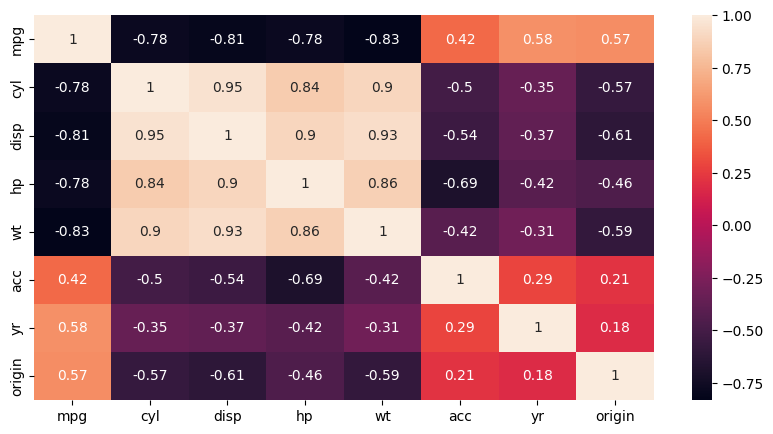

In [19]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [20]:
df.drop('acc', axis=1, inplace=True)
df.drop('yr', axis=1, inplace=True)
df.drop('origin', axis=1, inplace=True)
df.head()

,mpg,cyl,disp,hp,wt
0,0.239362,1.0,0.617571,0.456522,0.536150
1,0.159574,1.0,0.728682,0.646739,0.589736
2,0.239362,1.0,0.645995,0.565217,0.516870
3,0.186170,1.0,0.609819,0.565217,0.516019
4,0.212766,1.0,0.604651,0.510870,0.520556


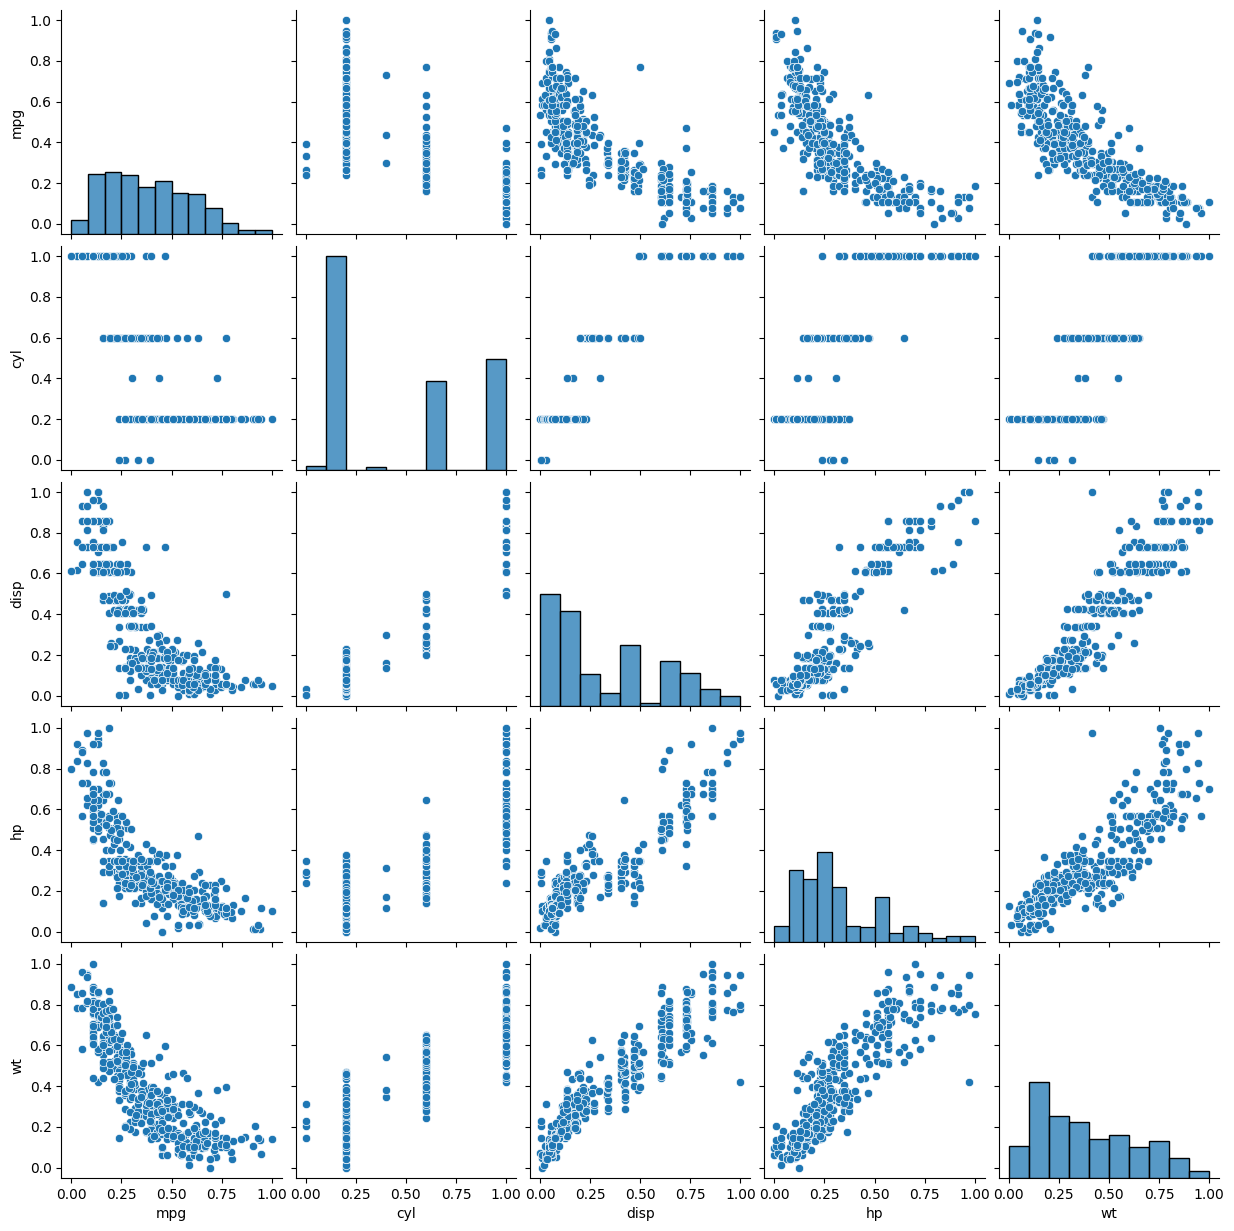

In [21]:
# Plot the data for each 2 columns
sns.pairplot(df)

In [22]:
# Only get the most correlated features
df = df[['mpg','cyl','disp','hp','wt']]

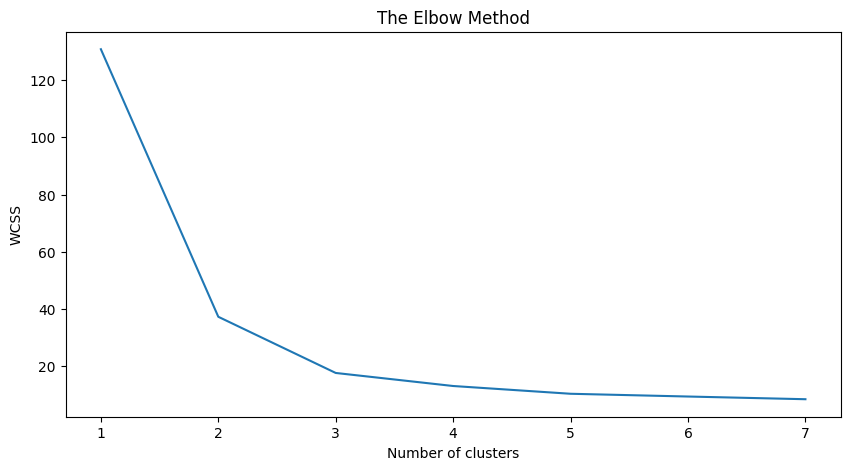

In [23]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

In [25]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(df, y_kmeans)

0.5906950906329779

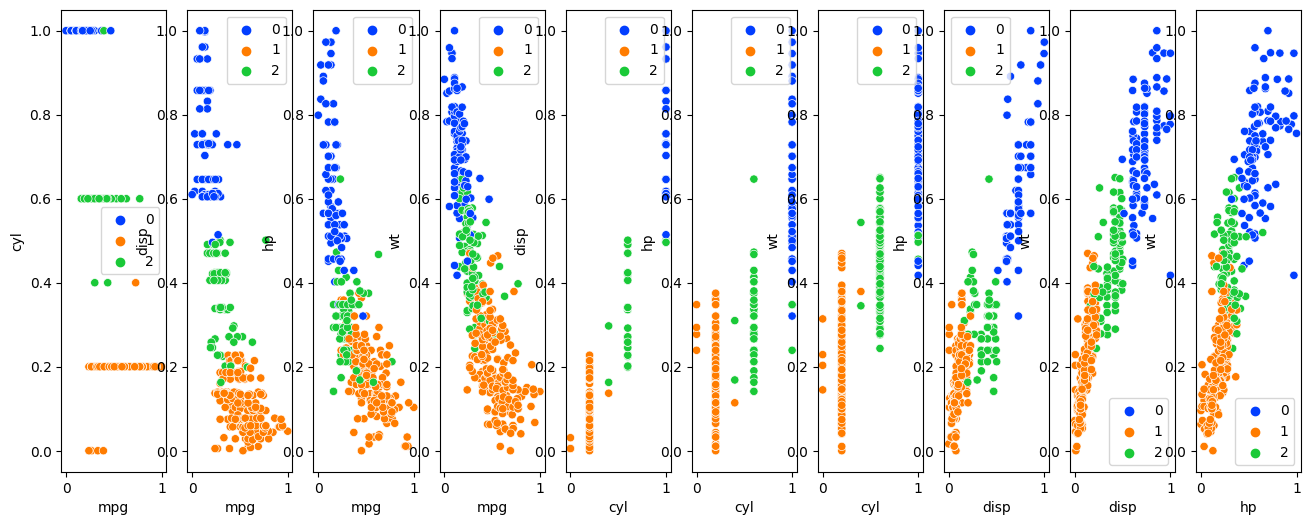

In [26]:
# Plot for each 2 columns
fig, ax = plt.subplots(1, 10, figsize=(16, 6))
palette = sns.color_palette('bright', 6)
sns.scatterplot(x='mpg', y='cyl', hue=y_kmeans, palette=palette, data=df, ax=ax[0])
sns.scatterplot(x='mpg', y='disp', hue=y_kmeans, palette=palette, data=df, ax=ax[1])
sns.scatterplot(x='mpg', y='hp', hue=y_kmeans, palette=palette, data=df, ax=ax[2])
sns.scatterplot(x='mpg', y='wt', hue=y_kmeans, palette=palette, data=df, ax=ax[3])
sns.scatterplot(x='cyl', y='disp', hue=y_kmeans, palette=palette, data=df, ax=ax[4])
sns.scatterplot(x='cyl', y='hp', hue=y_kmeans, palette=palette, data=df, ax=ax[5])
sns.scatterplot(x='cyl', y='wt', hue=y_kmeans, palette=palette, data=df, ax=ax[6])
sns.scatterplot(x='disp', y='hp', hue=y_kmeans, palette=palette, data=df, ax=ax[7])
sns.scatterplot(x='disp', y='wt', hue=y_kmeans, palette=palette, data=df, ax=ax[8])
sns.scatterplot(x='hp', y='wt', hue=y_kmeans, palette=palette, data=df, ax=ax[9])

plt.show()

In [27]:
df['Cluster'] = y_kmeans

In [28]:
df

,mpg,cyl,disp,hp,wt,Cluster
0,0.239362,1.0,0.617571,0.456522,0.536150,0
1,0.159574,1.0,0.728682,0.646739,0.589736,0
2,0.239362,1.0,0.645995,0.565217,0.516870,0
3,0.186170,1.0,0.609819,0.565217,0.516019,0
4,0.212766,1.0,0.604651,0.510870,0.520556,0
...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,1
388,0.930851,0.2,0.074935,0.032609,0.146583,1
389,0.611702,0.2,0.173127,0.206522,0.193365,1
390,0.505319,0.2,0.134367,0.179348,0.286929,1


In [32]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(kmeans, model_file)

In [29]:
df.to_pickle("./model.pkl")

In [30]:
import pickle
loaded_model = pickle.load(open("./model.pkl", "rb"))

In [31]:
print(type(loaded_model))

<class 'pandas.core.frame.DataFrame'>
